# Sparkify Project Workspace
This workspace contains a tiny subset (128MB) of the full dataset available (12GB). Feel free to use this workspace to build your project, or to explore a smaller subset with Spark before deploying your cluster on the cloud. Instructions for setting up your Spark cluster is included in the last lesson of the Extracurricular Spark Course content.

You can follow the steps below to guide your data analysis and model building portion of this project.

In [ ]:
## emr-5.26.0

In [1]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
          "driverMemory": "6000M"
         }
}

In [2]:
# %%configure -f 
# {"driverMemory": "6000M"}

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
17,application_1642840270497_0018,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# %%configure -f 
# {"livy.server.session.timeout": "2h"}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.install_pypi_package("pandas==0.25.1") 
sc.install_pypi_package("matplotlib==3.1.0", "https://pypi.org/simple")
sc.install_pypi_package("seaborn==0.8.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl (10.5 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)

  Using cached matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (13.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)

  Using cached seaborn-0.8.1-py3-none-any.whl
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)

In [5]:
import matplotlib
matplotlib.__version__

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'3.1.0'

In [6]:
# import libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, DateType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum,  min as Fmin, max as Fmax
from pyspark.sql import functions as F
from pyspark.sql import Window
from pyspark.sql.functions import from_unixtime
from pyspark.ml.feature import StringIndexer

pd.options.display.max_columns = 0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
%%local
%matplotlib inline

In [8]:
# create a Spark session
spark = SparkSession.builder.appName("Sparkify").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# get information
spark

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load and Clean Dataset
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [10]:
# load dataset
#df = spark.read.json('mini_sparkify_event_data.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# load full dataset 

df = spark.read.json('s3n://udacity-dsnd/sparkify/sparkify_event_data.json')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
# print schema
# df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# check row data
# df.head(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# convert unixtime to datetime
df = df.withColumn('datetime', from_unixtime(df.ts/1000))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
# use pandas to check with readable format
# df_5 = df.limit(5).toPandas()
# df_5.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# total data count
# df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Cleanup data

In [17]:
# check null valuse
# column_null_count = {col:df.filter(df[col].isNull()).count() for col in df.columns}
# column_null_count

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
# check userid
# df.select("userId").dropDuplicates().sort("userId").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# remove empty userid rows
# print(f'prev: {df.count()}')
# df = df.filter(df["userId"]!="")
# print(f'after: {df.count()}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Exploratory Data Analysis
When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.

### Define Churn

Once you've done some preliminary analysis, create a column `Churn` to use as the label for your model. I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

### Explore Data
Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

In [20]:
# count records by page
# df.groupby('page').count().orderBy(desc('count')).show(100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# create churn column 
cancel_event = udf(lambda x: 1 if x == 'Cancellation Confirmation' else 0, IntegerType())
df = df.withColumn('churn', cancel_event('page'))

#create downgrade column
downgrade_event = udf(lambda x: 1 if x == 'Downgrade' else 0, IntegerType())
df = df.withColumn('downgrade', downgrade_event('page'))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# flag churned user 
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)
df = df.withColumn("churn", Fsum("churn").over(windowval))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
# show cancelled user 
#df.filter("page == 'Cancellation Confirmation'").head()
# 125 user canceled
# df.filter("userId == '125'").select(['userId', 'page', 'churn', 'downgrade', 'datetime']).orderBy('ts').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
# check date's date time
# df.agg(Fmin(df.datetime), Fmax(df.datetime)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
# create played hour column
# get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)
# df = df.withColumn("hour", get_hour(df.ts))
# songs_in_hour = df.filter(df.page == "NextSong").groupby(df.hour, df.churn).count().orderBy(df.hour.cast("float"))
# songs_in_hour.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
# plot song played count and time 
# songs_in_hour_pd = songs_in_hour.toPandas()
# songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

# s = sns.scatterplot(data=songs_in_hour_pd, x="hour", y="count", hue='churn')
# s.set(title="Songs played", xlabel='Hour', ylabel='Song count')
# s.set(xlim=(-1, 24))
# s.set(ylim=(0, 1.2 * max(songs_in_hour_pd["count"])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# songs_in_hour_pd.plot.scatter(x='hour',
#                       y='count',
#                       c='churn',
#                       colormap='viridis')
# plt.ylabel('count')
# plt.xlabel('hour')
# plt.title('Song played  in a day ')
# %matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# check churn by gender 

# churn_by_gender_df = df.groupby(df.gender, df.churn).count().toPandas()
# churn_by_gender_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# plot bar chart
# churn_by_gender_df.pivot(index='gender', columns='churn', values='count').plot.bar(stacked=True, title='Gender and churn');
# %matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
# churned = np.array(churn_by_gender_df[churn_by_gender_df['churn'] == 1]['count'])
# user_all = np.array(churn_by_gender_df.groupby('gender').sum()['count'])
# p = (churned / user_all )* 100
# print(f"Cancel rate F: {p[0]:.2f}%     M: {p[1]:.2f}%" )      

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
# check churn by level 
# churn_by_level_df = df.groupby(df.level, df.churn).count().toPandas()
# churn_by_level_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
# plot bar chart 
# churn_by_level_df.pivot(index='level', columns='churn', values='count').plot.bar(stacked=True, title='Level and churn')
# %matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
# churned = np.array(churn_by_level_df[churn_by_level_df['churn'] == 1]['count'])
# user_all = np.array(churn_by_level_df.groupby('level').sum()['count'])
# p = (churned / user_all )* 100
# print(f"Cancel rate Free: {p[0]:.2f}%     Paied: {p[1]:.2f}%" )      

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
# find location
def find_location(location_str):
    try:
        if location_str != None:
            locations = location_str.split(',')
            if 0 < len(locations):
                if locations[1] != None:
                    return str(locations[1]).strip()
    except:
        pass    
    
    return ''

get_location_chr = udf(lambda x: find_location(x))
df = df.withColumn("location_code", get_location_chr(df.location))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
# find by location 


#get_location_chr = udf(lambda x: (x.split(',')[1]).strip())

#df = df.withColumn("location_code", get_location_chr(df.location))

location_df = df.groupby('location_code', 'churn').count().orderBy(desc('count')).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

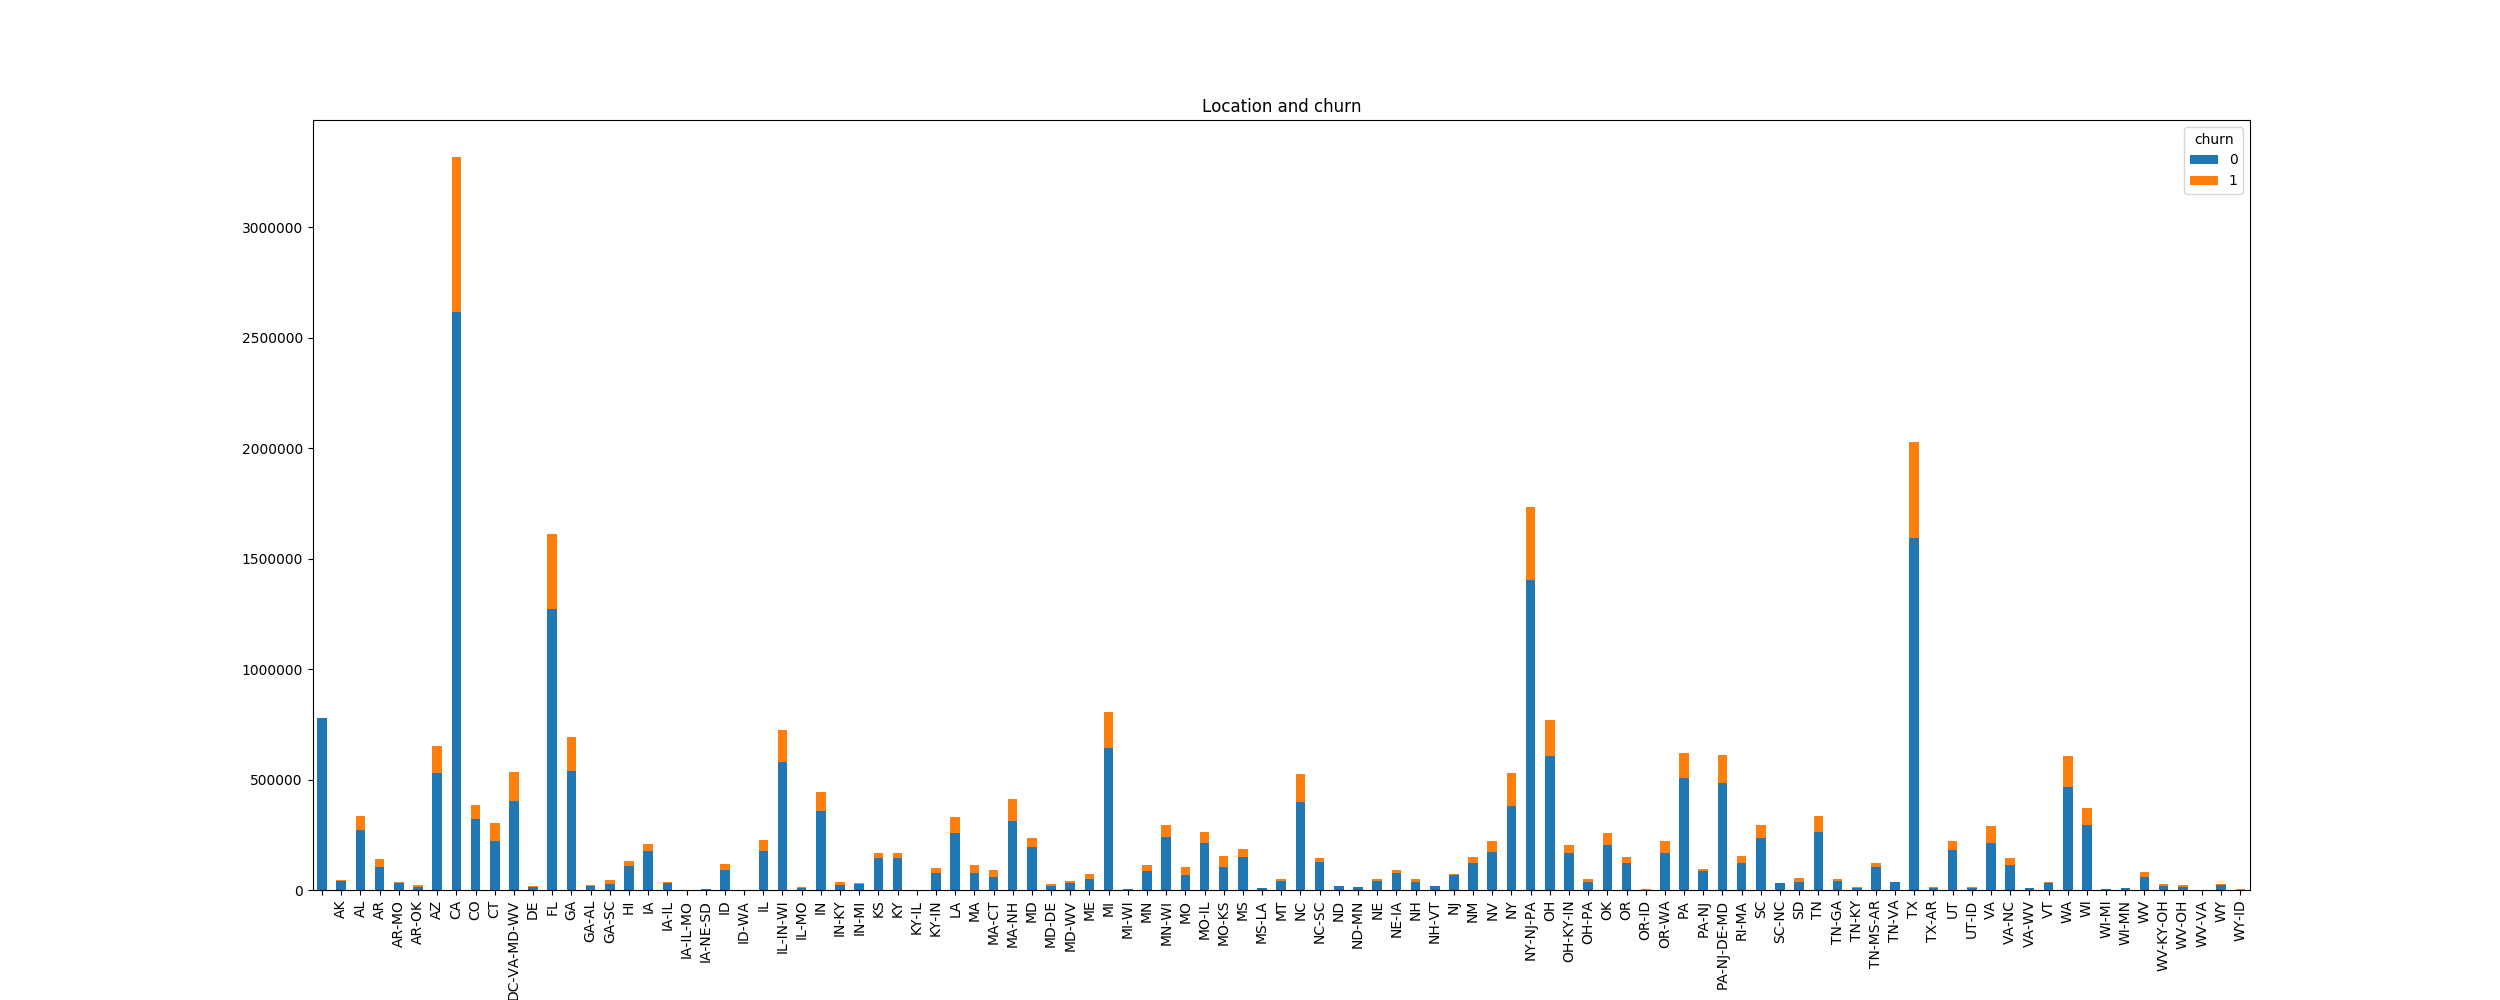

In [46]:
#plot chart 
location_df.pivot(index='location_code', columns='churn', values='count').plot.bar(stacked=True, title='Location and churn', figsize=(25,10))
%matplot plt

In [45]:
# check user agents
list(df.groupby('userAgent').count().orderBy(desc('count')).select('userAgent').toPandas()['userAgent'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', '"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', '"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', '"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2"', '"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', '"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.77.4 (KHTML, like Gecko) Version/7.0.5 Safari/537.77.4"', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:31.0) Gecko/20100101 Firefox/31.0', '"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Sa

In [35]:
#create user_gent_category
user_agent_bukets = ['macintosh', 'windows', 'linux', 'iphone', 'ipad']

def  get_useragent(user_agent_str):
    try:
        for agent in user_agent_bukets:
            if agent in user_agent_str.lower():
                return agent
    except:
        pass
    
    return 'etc'

get_agetn_bucket= udf(lambda x: get_useragent(x), StringType())
df = df.withColumn("useragent_code", get_agetn_bucket('userAgent'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
# useragent churn data
useragent_df = df.groupby('useragent_code', 'churn').count().orderBy(desc('count')).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

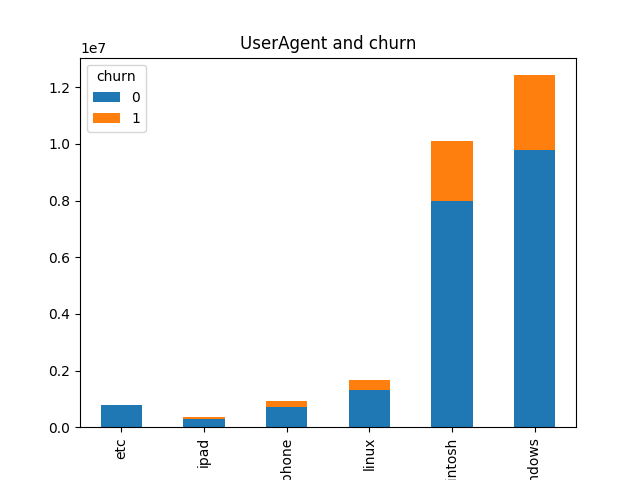

In [42]:
#plot chart 
useragent_df.pivot(index='useragent_code', columns='churn', values='count').plot.bar(stacked=True, title='UserAgent and churn')
%matplot plt

In [43]:
# page and chuan
churn_by_page_df = df.groupby('page', 'churn').count().orderBy(desc('count')).toPandas()
churn_by_page_df
#page_df.pivot(index='page', columns='churn', values='count').plot.bar(stacked=True, title='Page and churn')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                         page  churn     count
0                    NextSong      0  16463996
1                    NextSong      1   4386276
2                        Home      0   1145400
3                   Thumbs Up      0    926993
4             Add to Playlist      0    473265
5                  Add Friend      0    301654
6                       Login      0    296350
7                 Roll Advert      0    284906
8                      Logout      0    233305
9                   Thumbs Up      1    224472
10                       Home      1    197702
11                Thumbs Down      0    183556
12                  Downgrade      0    140816
13                       Help      0    127598
14            Add to Playlist      1    124656
15                   Settings      0    115357
16                Roll Advert      1    100306
17                      About      0     82657
18                 Add Friend      1     80010
19                     Logout      1     62700
20           

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

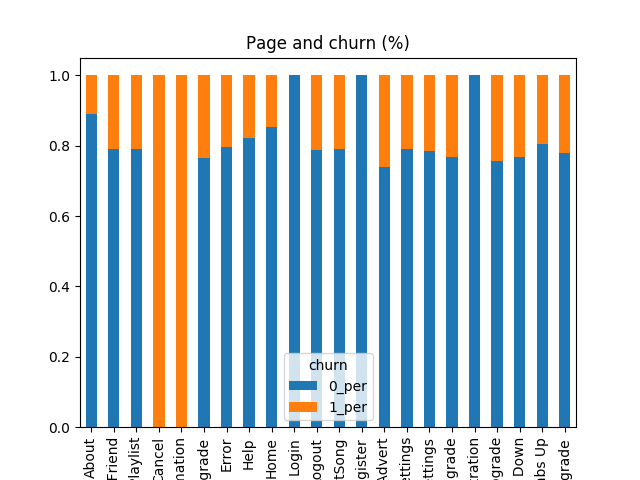

In [44]:
_tmpdf = churn_by_page_df.pivot(index='page', columns='churn', values='count').fillna(0)
_tmpdf['total'] = _tmpdf[0] + _tmpdf[1]
_tmpdf['0_per'] = _tmpdf[0] / _tmpdf['total']
_tmpdf['1_per'] = _tmpdf[1] / _tmpdf['total']
_tmpdf.plot.bar(stacked=True, title='Page and churn (%)', y=['0_per', '1_per'])
%matplot plt

# Feature Engineering
Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
- Write a script to extract the necessary features from the smaller subset of data
- Ensure that your script is scalable, using the best practices discussed in Lesson 3
- Try your script on the full data set, debugging your script if necessary

If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.

Going to use these values as a future

- gender
- level
- device 
- total song played
- first_ts
- last_ts
- days from start
- free days
- payed days
- total add friend
- total add to playlist
- total downgrade
- total error
- total help
- total home
- total roll advert
- total upgrade
- total thumb down
- total thumb up
- total session
- average time between per session
- average song played per session
- location
- device

In [36]:
# create user_feature_matrix functions


def creae_churn(df=df):
    _df = df.select(['userId', 'churn']).groupby('UserId').agg(F.max('churn').alias('churn'))
    return _df

def create_downgrade(df=df):
    _df = df.select(['userId', 'downgrade']).groupby('userId').agg(F.max('downgrade').alias('downgrade'))
    return _df
    


# create page count 
def create_page_count(page, df=df):
    """
    Create page count by user DataFrame
    :param page: page name string
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.filter(f"page=='{page}'").select(['userId', 'page']).groupby('userId').agg(F.count('page').alias(f'{page}_count'))
    return _df

# gender
def create_gender(df=df):
    """
    Create userId-gender DataFrame
    :param df: SparkDF
    :return id-gender SparkDF
    """
    _df =  df.select(['userId','gender']).groupby('userId').agg(F.last('gender').alias('gender'))
    return _df

# level
def create_level(df=df):
    """
    Create userId-level DataFrame
    :param df: SparkDF
    :return id-level SparkDF
    """
    _df = df.select(['userId','level']).groupby('userId').agg(F.last('level').alias('level'))
    return _df

# song played
def create_song_played(df=df):
    """
    Create song played count by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    return create_page_count('NextSong', df)

# first_ts
def create_first_ts(df=df):
    """
    Create First time by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'ts']).groupby('userId').agg(F.min('ts').alias('first_ts'))
    return _df

# last_ts
def create_last_ts(df=df):
    """
    Create Last time by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'ts']).groupby('userId').agg(F.max('ts').alias('last_ts'))
    return _df

# using days (days from start)
def create_days_from_first_to_last(df=df):
    """
    Create days between first use and last use by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'ts']).groupby('userId').agg(((F.max('ts') - F.min('ts'))/(1000*60*60*24)).alias('user_days'))
    return _df
    
# free days
def create_free_days(df=df):
    """
    Create free level days by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'ts', 'level']).filter("level == 'free'").groupby('userId').agg(((F.max('ts') - F.min('ts'))/(1000*60*60*24)).alias('freeuser_days'))
    return _df

# payed days
def create_paid_days(df=df):
    """
    Create payed level daysby user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'ts', 'level']).filter("level == 'paid'").groupby('userId').agg(((F.max('ts') - F.min('ts'))/(1000*60*60*24)).alias('paiduser_days'))
    return _df    

# total session
def create_session(df=df):
    """
    Create session average by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'sessionId', 'page']).groupby('userId', 'sessionId').agg(F.count('page').alias('session_count'))\
        .groupby('userId').agg(F.avg('session_count').alias('session_avg'))
    return _df

# - average time between per session
def create_average_time_between_session(df=df):
    """
    Create average time between session sesond by user DataFrame
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'sessionId', 'ts']).groupby('userId', 'sessionId').agg(((F.max('ts') - F.min('ts'))/(1000)).alias('session_ts'))\
       .groupby('userId').agg(F.avg('session_ts').alias('session_ts_avg'))
    return _df

# - average song played per session
def create_avg_songplayed_between_session(df=df):
    """
    Create average song count between session
    :param df: SparkDF
    :return SparkDF
    """
    _df = df.select(['userId', 'sessionId', 'page']).filter("page == 'NextSong'").groupby('userId', 'sessionId').agg(F.count('page').alias('song_count'))\
        .groupby('userId').agg(F.avg('song_count').alias('song_avg_per_session'))
    return _df    

# location
def create_top_location(df=df):
    """
    Create most common location code by user
    :param df: SparkDF
    :return SparkDF
    """
#    indexer = StringIndexer(inputCol='location_code', outputCol='location_code_cat')
        
    _df = df.withColumn("location_code", get_location_chr('location'))
    _df = df.select(['userId', 'location_code']).groupby('userId', 'location_code').agg(F.count('location_code').alias('location_code_count'))\
        .orderBy(desc('location_code_count')).groupby('userId').agg(F.first('location_code').alias('location_code'))
        
    return _df

# device
def create_top_device(df=df):
    """
    Create most common device code by user
    :param df: SparkDF
    :return SparkDF
    """
#     indexer = StringIndexer(inputCol='useragent_code', outputCol='useragent_code_cat')
    
    _df = df.withColumn("useragent_code", get_agetn_bucket('userAgent'))
    _df = _df.select(['userId', 'useragent_code']).groupby('userId', 'useragent_code').agg(F.count('useragent_code').alias('useragent_code_count'))\
        .orderBy(desc('useragent_code_count')).groupby('userId').agg(F.first('useragent_code').alias('useragent_code'))
    return _df
    

## test 
#create_gender().show()
#create_level().show()
#create_song_played().show()
#create_first_ts().show()
#create_days_from_first_to_last().show()
#create_free_days().show()
#create_paid_days().show()
#create_session().show()
#create_average_time_between_session().show()
#create_avg_songplayed_between_session().show()
#create_top_location().show()
#create_top_device().show()

#creae_churn().show()
#create_downgrade().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# run separately for debug 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
_gender_df =  create_gender()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
_level_df = create_level()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
_song_df = create_song_played()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
_firstts_df = create_first_ts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
_lastts_df = create_last_ts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
_fl_days_df = create_days_from_first_to_last()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
_freedays_df = create_free_days()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
_paiddays_df = create_paid_days()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
_session_df = create_session()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
_avgtime_df = create_average_time_between_session()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
_avgsong_df = create_avg_songplayed_between_session()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
_toplocation_df = create_top_location()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
_topdevice_df = create_top_device()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
# create combined user-feature matrix
user_feature_df = _gender_df\
    .join(_level_df, on='userId', how='left')\
    .join(_song_df, on='userId', how='left')\
    .join(_firstts_df , on='userId', how='left')\
    .join(_lastts_df, on='userId', how='left')\
    .join(_fl_days_df, on='userId', how='left')\
    .join(_freedays_df, on='userId', how='left')\
    .join(_paiddays_df, on='userId', how='left')\
    .join(_session_df, on='userId', how='left')\
    .join(_avgtime_df, on='userId', how='left')\
    .join(_avgsong_df, on='userId', how='left')\
    .join(creae_churn(), on='userId', how='left')\
    .join(create_downgrade(), on='userId', how='left')\
    .join(create_page_count('Thumbs Up'), on='userId', how='left')\
    .join(create_page_count('Home'), on='userId', how='left')\
    .join(create_page_count('Add to Playlist'), on='userId', how='left')\
    .join(create_page_count('Add Friend'), on='userId', how='left')\
    .join(create_page_count('Roll Advert'), on='userId', how='left')\
    .join(create_page_count('Thumbs Down'), on='userId', how='left')\
    .join(create_page_count('Downgrade'), on='userId', how='left')\
    .join(create_page_count('Help'), on='userId', how='left')\
    .join(create_page_count('Upgrade'), on='userId', how='left')\
    .join(_toplocation_df, on='userId', how='left')\
    .join(_topdevice_df, on='userId', how='left')

user_feature_df = user_feature_df.fillna(0)

user_feature_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------+-----+--------------+-------------+-------------+------------------+-------------------+------------------+------------------+------------------+--------------------+-----+---------+---------------+----------+---------------------+----------------+-----------------+-----------------+---------------+----------+-------------+-------------+--------------+
| userId|gender|level|NextSong_count|     first_ts|      last_ts|         user_days|      freeuser_days|     paiduser_days|       session_avg|    session_ts_avg|song_avg_per_session|churn|downgrade|Thumbs Up_count|Home_count|Add to Playlist_count|Add Friend_count|Roll Advert_count|Thumbs Down_count|Downgrade_count|Help_count|Upgrade_count|location_code|useragent_code|
+-------+------+-----+--------------+-------------+-------------+------------------+-------------------+------------------+------------------+------------------+--------------------+-----+---------+---------------+----------+---------------------+-----------

In [ ]:
# display corr heatmap
# user_feature_pandas_df = user_feature_df.toPandas()
# corr = user_feature_pandas_df.corr()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

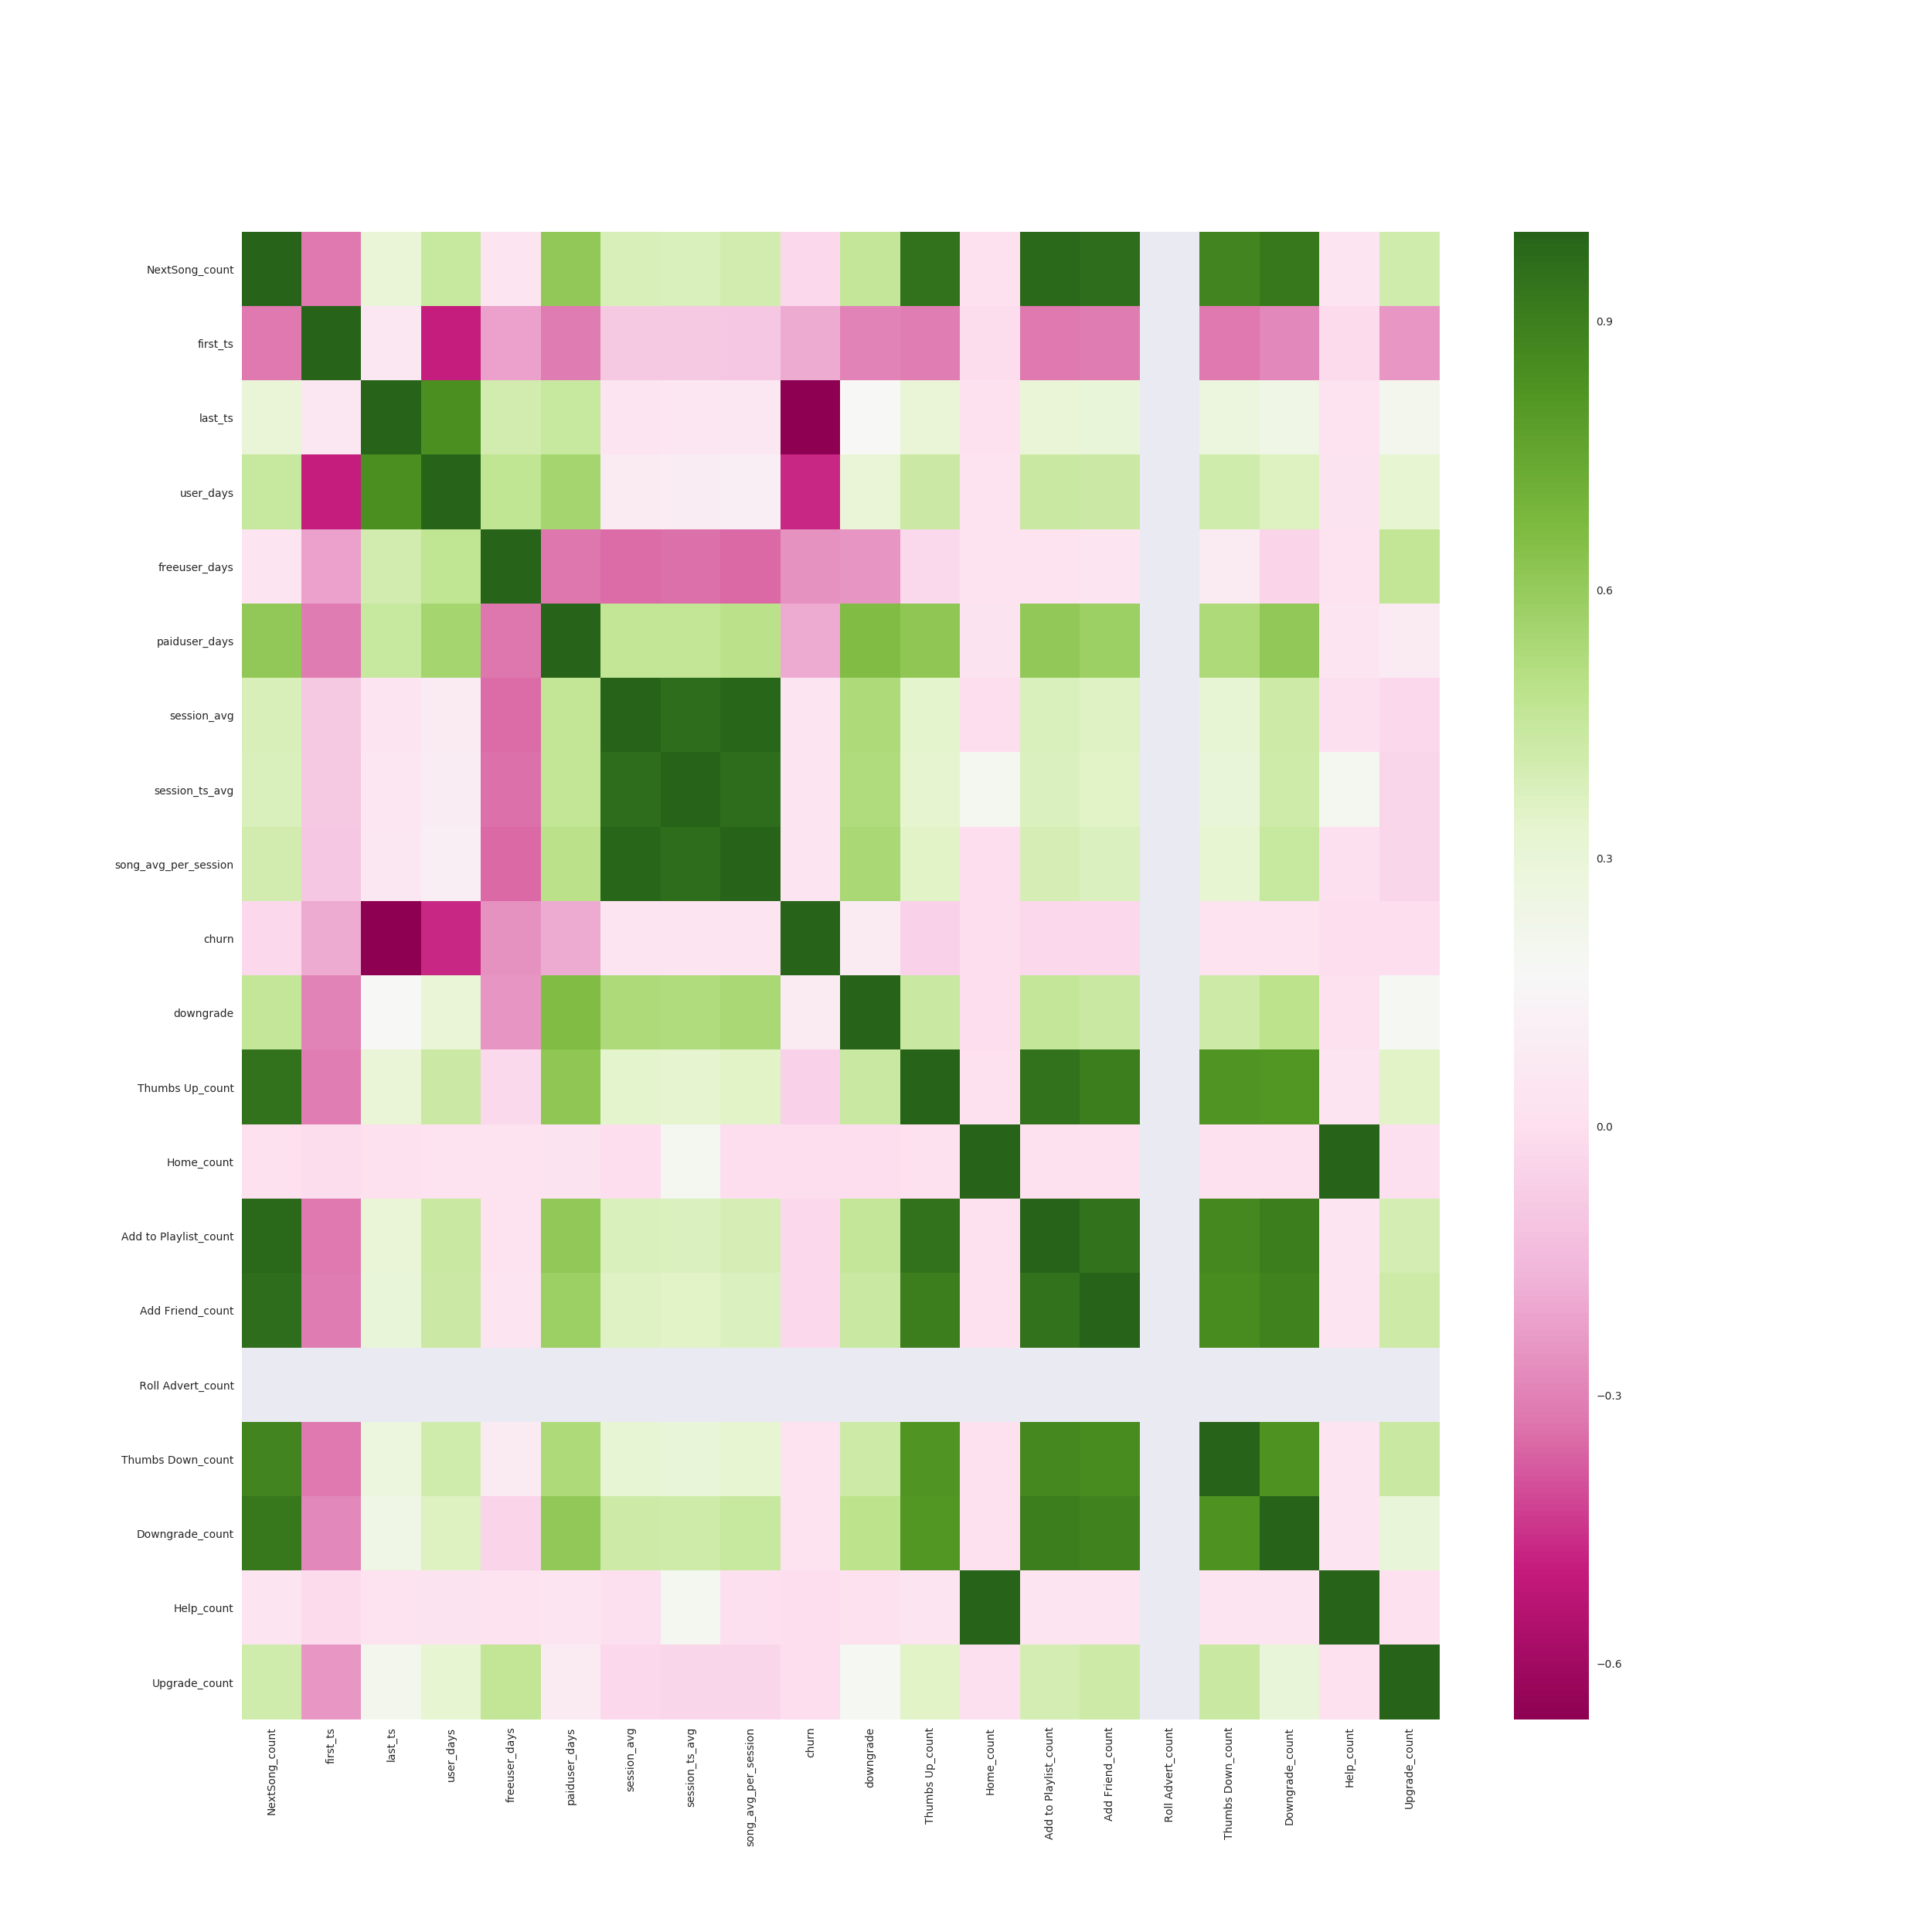

In [108]:
# sns.set(rc = {'figure.figsize':(15, 10)})
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="PiYG")
# %matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

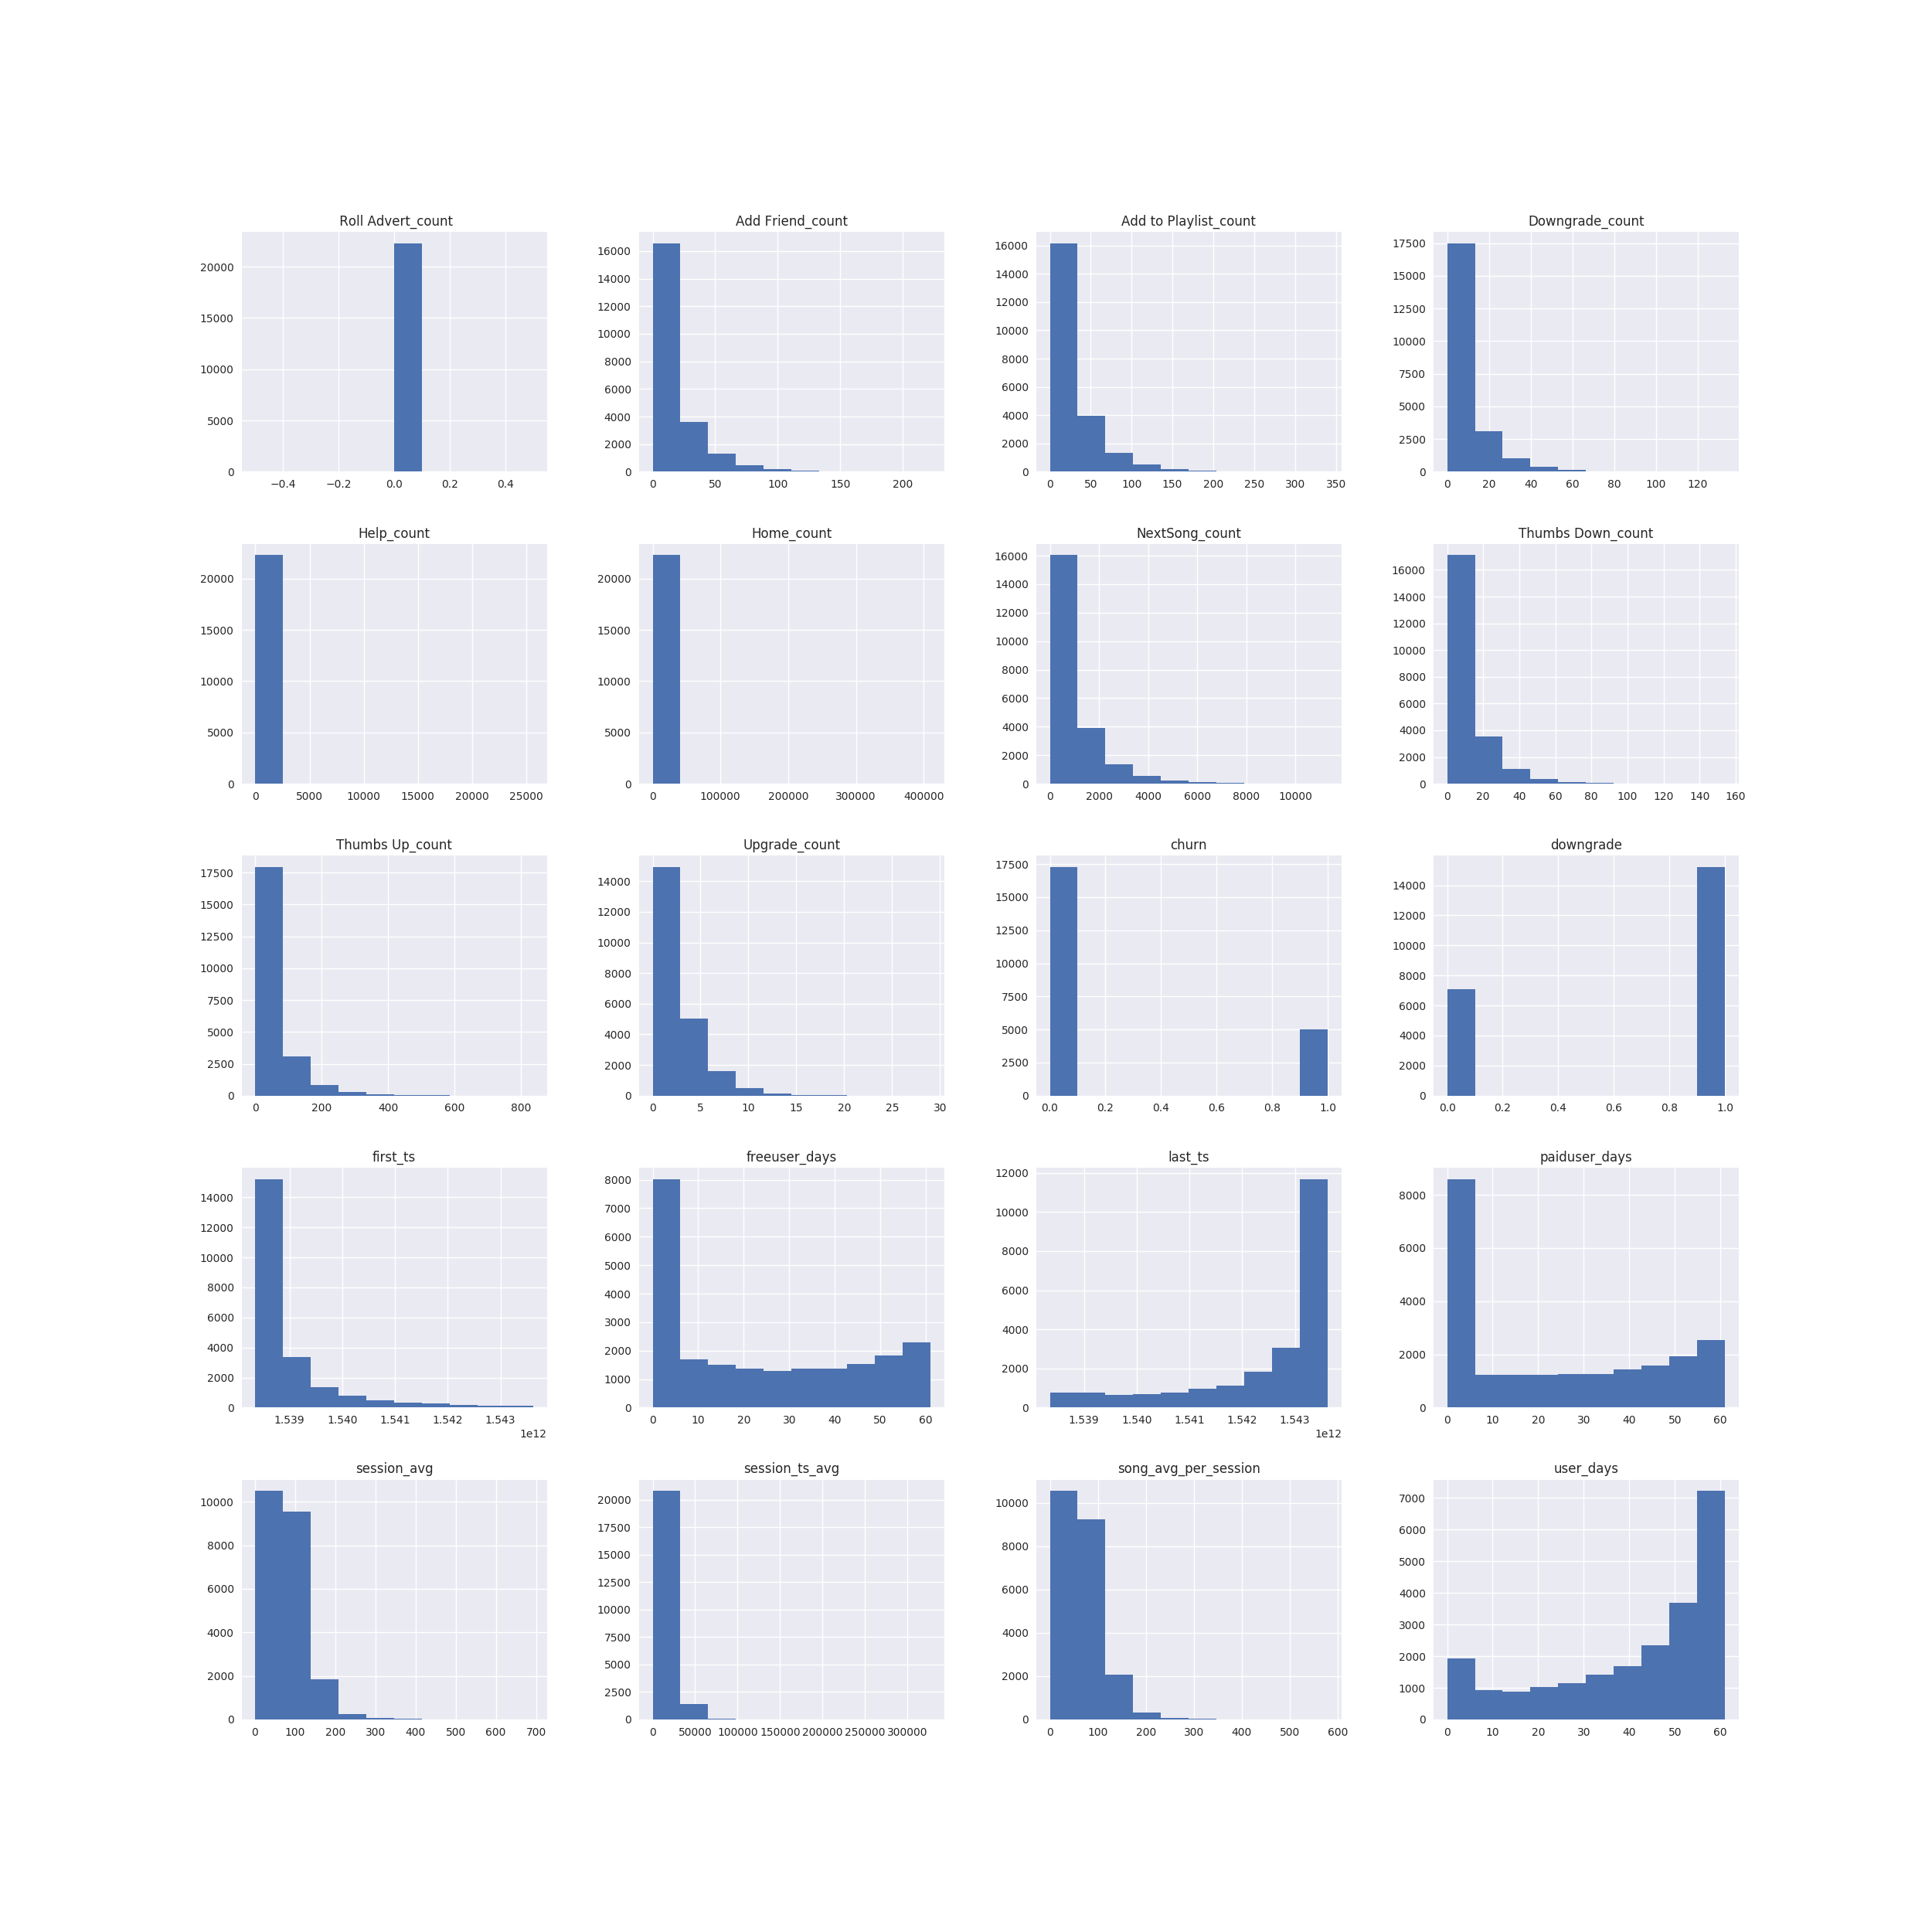

In [109]:
# fig = plt.figure(figsize=(25,25))
# ax = fig.gca()
# h = user_feature_pandas_df.hist(ax=ax)
# %matplot plt

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

In [52]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import CountVectorizer, IDF, Normalizer, PCA, RegexTokenizer, StandardScaler, StopWordsRemover, StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## split dataset

In [ ]:
# split train test valid 7:2:1
#train, test = user_feature_df.randomSplit([0.7, 0.3], seed=42)

count = user_feature_df.count()
test_count = int(count * 0.7)

train = user_feature_df.iloc[:test_count]
test = user_feature_df.iloc[test_count:]

print(f"train {train.count()}, test {test.count()}")

## create pipeline

In [ ]:
# stringindexer and  onehotencoder
gender_idxr = StringIndexer(inputCol='gender', outputCol='gender_idx')
lavel_idxr = StringIndexer(inputCol='level', outputCol='lebel_idx')
location_idxr = StringIndexer(inputCol='location_code', outputCol='location_idx')
useragent_idxr = StringIndexer(inputCol='useragent_code', outputCol='useragent_idx')

location_ohe = OneHotEncoder(inputCol="location_idx", outputCol="location_code_vec")
useragent_ohe = OneHotEncoder(inputCol='useragent_idx', outputCol='useragent_code_vec')

In [55]:
# combine vector
input_cols = []

for f in user_feature_df.schema.fields :
    if f.dataType!=StringType():
        input_cols.append(f.name)

input_cols.remove('churn')

print(input_cols)

assembler = VectorAssembler(inputCols=input_cols, outputCol='features')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['NextSong_count', 'first_ts', 'last_ts', 'user_days', 'freeuser_days', 'paiduser_days', 'session_avg', 'session_ts_avg', 'song_avg_per_session', 'downgrade', 'Thumbs Up_count', 'Home_count', 'Add to Playlist_count', 'Add Friend_count', 'Roll Advert_count', 'Thumbs Down_count', 'Downgrade_count', 'Help_count', 'Upgrade_count']

In [56]:
# normalize 
normalizer = Normalizer(inputCol="features", outputCol="normalized_features")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
def evaluate(pred):
    """
    Use Eveluator to check the score
    :param pred: DparkDataFrame 
    """
    evaluator = MulticlassClassificationEvaluator(labelCol="churn", predictionCol="prediction", metricName="f1")
    f1_score = evaluator.evaluate(pred)
    
    accuracy = pred.filter(pred.churn == pred.prediction).count() / pred.count()
    
    print(f'f1 score: {f1_score}, accuracy: {accuracy}')    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Logistic Regression Model

In [ ]:
# create logistic regression model
lr = LogisticRegression(labelCol="churn", featuresCol="normalized_features")

#pipeline
lr_pipeline = Pipeline(stages=[
    gender_idxr,
    lavel_idxr,
    location_idxr,
    useragent_idxr,
    location_ohe,
    useragent_ohe,
    assembler,
    normalizer,
    lr
])

#train model
lr_model = lr_pipeline.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# predict
lr_pred = lr_model.transform(test)

In [ ]:
#evaluate  lr model
evaluate(lr_pred)

In [ ]:
# plot matrix 
lr_model_cm = lr_model.stages[8].coefficientMatrix

lr_importances = pd.Series(lr_model_cm.values, index=input_cols)
fig, ax = plt.subplots()
lr_importances.plot.bar(ax=ax)
ax.set_title("Coefficient Matrix")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
%matplot plt

## Random Forest Model

In [ ]:
rf = RandomForestClassifier(labelCol="churn", featuresCol="normalized_features")

#pipeline
rf_pipeline = Pipeline(stages=[
    gender_idxr,
    lavel_idxr,
    location_idxr,
    useragent_idxr,
    location_ohe,
    useragent_ohe,
    assembler,
    normalizer,
    rf
])

#train 
rf_mode = rf_pipeline.fit(train)

In [ ]:
# predict
rf_pred = rf_mode.transform(test)

In [ ]:
#evaluate  
evaluate(rf_pred)

In [ ]:
#plot matrix
rf_model_fi = rf_model.stages[8].featureImportances

forest_importances = pd.Series(rf_model_fi, index=input_cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
%matplot plt

## Gradient-Boosted Trees (GBTs)

In [ ]:
gbt = GBTClassifier(labelCol="churn", featuresCol="normalized_features")

# build pipeline
gbt_pipeline = Pipeline(stages=[
    gender_idxr,
    lavel_idxr,
    location_idxr,
    useragent_idxr,
    location_ohe,
    useragent_ohe,
    assembler,
    normalizer,
    gbt
])


# train 
gbt_model = gbt_pipeline.fit(train)


In [ ]:
# predict
gbt_pred = gbt_model_mode.transform(test)

In [ ]:
#evaluate  
evaluate(gbt_pred)

In [ ]:
#plot matrix
gbt_model_fi = gbt_model.stages[8].featureImportances

gbt_importances = pd.Series(gbt_model_fi, index=input_cols)
fig, ax = plt.subplots()
gbt_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
%matplot plt

## Tuning

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [10, 20]) \
    .build()

crossval = CrossValidator(estimator=rf_pipeline,
                  estimatorParamMaps=paramGrid,
                  evaluator=MulticlassClassificationEvaluator(labelCol="churn", predictionCol="prediction", metricName="f1"),
                  numFolds=3)

cv_model = crossval.fit(train)

In [ ]:
#predict
cv_preds = cv_model.transform(test)

In [ ]:
#evaluate  
evaluate(cv_pred)

In [ ]:
#best model
best_pipeline = cv_model.bestModel
best_model = best_pipeline.stages[2]
best_model.extractParamMap()

# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.